In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd
from skimage.feature import peak_local_max

all_data={}
my_array=np.zeros((250,250,400))
stds=np.zeros((250,250,400))
data03=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_SFRT_waterphantom200MeV__2.csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
data03.stderror=data03.stderror/np.sqrt(500000)
for i in np.arange(2,21):
    data1=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_SFRT_waterphantom200MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
    data03.dose=data03.dose + data1.dose
    data03.stderror=np.sqrt(data03.stderror**2+(data1.stderror/500000)**2)
data03.dose=data03.dose/(1.60218e-19)*(8.2*10**-9)/20
data03.stderror=data03.stderror/(1.60218e-19)*(8.2*10**-9)
for i in np.arange(0,len(data03.dose)):
    my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    stds[data03.x[i]][data03.y[i]][data03.z[i]]=data03.stderror[i]
all_data[200]=np.array(my_array)
all_data['std']=np.array(stds)

GRID= all_data[200]
GRID=GRID.T
GRID_std=all_data['std']
GRID_std=GRID_std.T

In [ ]:
all_data={}
my_array=np.zeros((250,250,400))
data03=pd.read_csv("D:Desktop/thesis/results/new_gammaprimary_clear_SFRT_waterphantom200MeV__2.csv",delimiter= ',',comment='#',names=['x','y','z','dose','std'],dtype={'x':int,'y':int,'z':int,'dose':float,'std':float})
for i in np.arange(2,21):
    data1=pd.read_csv("D:Desktop/thesis/results/new_gammaprimary_clear_SFRT_waterphantom200MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose','std'],dtype={'x':int,'y':int,'z':int,'dose':float,'std':float})
    data03.dose=data03.dose + data1.dose
data03.dose=data03.dose/(1.60218e-19)*(8.2*10**-9)/20
for i in np.arange(0,len(data03.dose)):
    my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
all_data[200]=np.array(my_array)

GRID_photon=all_data[200]
GRID_photon=GRID_photon.T

[13.962983353679977, 7.3142916937748605, 5.422744957664849, 10.547087688091242, 6.470244044568668, 16.35316037626496, 16.25567459941282, 19.56132319497464, 19.95049785294423, 18.593314453043504, 22.499725338649277] [32.508731638963, 32.623445319934966, 32.449235351425706, 32.183899941724086, 29.759441724068413, 25.838420639648806, 24.95433727945561, 21.729648881980545, 22.476527353659257, 21.676444166600767, 22.020743451436438] [21.555545517716716, 27.30642521772717, 28.576099382101038, 24.187934964250868, 24.900308400887393, 11.339651690429644, 10.38716669867855, 2.6956257525987235, 3.155584273434416, 3.787317580665883, 0.6180389544499342]
14.266458868460823 27.110988704445234 14.409972584812756


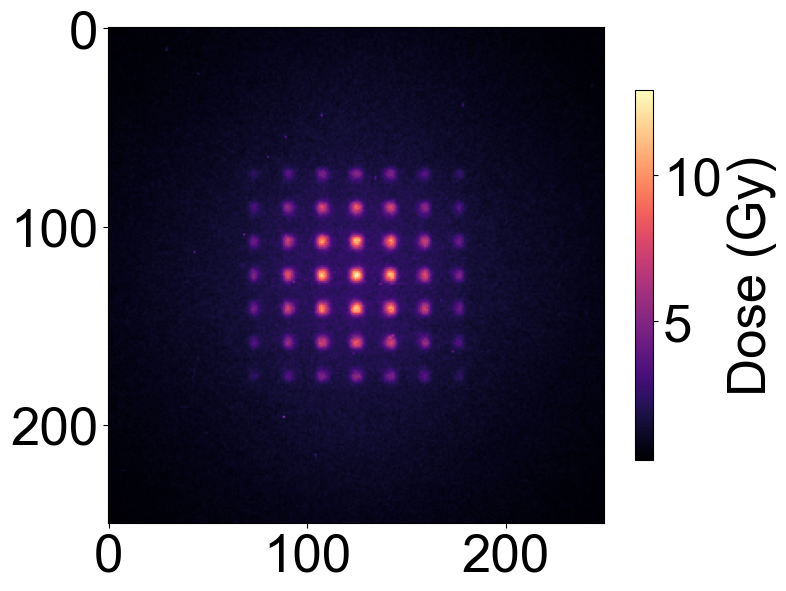

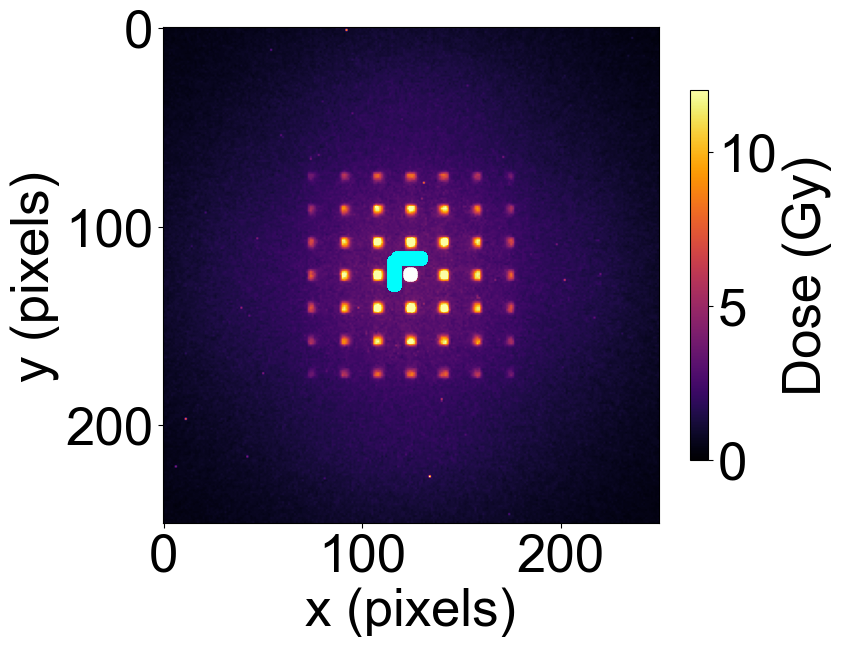

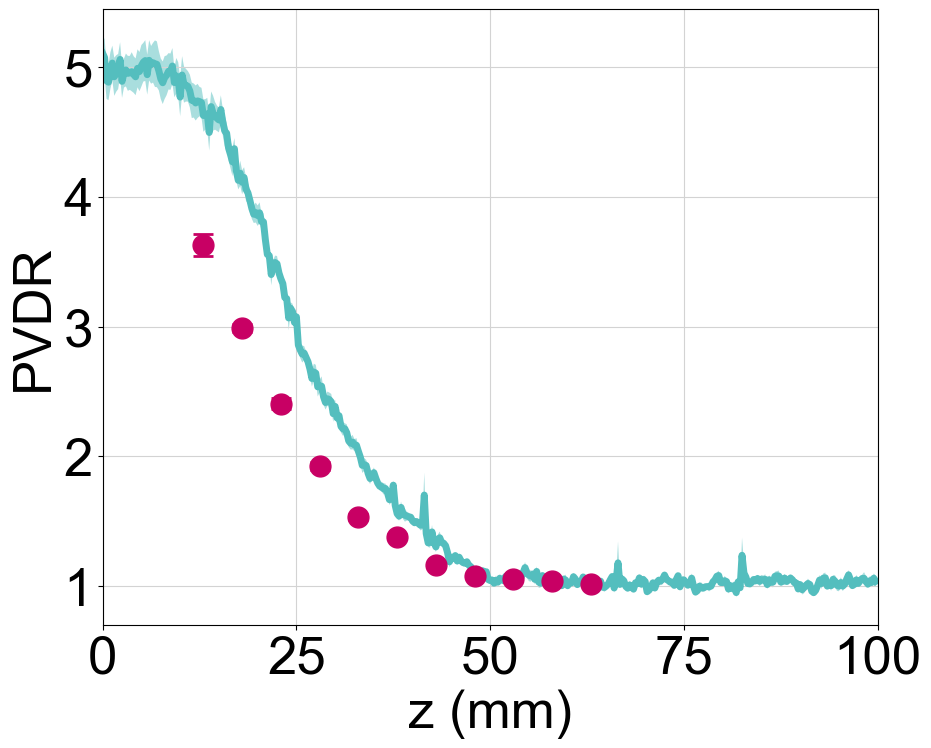

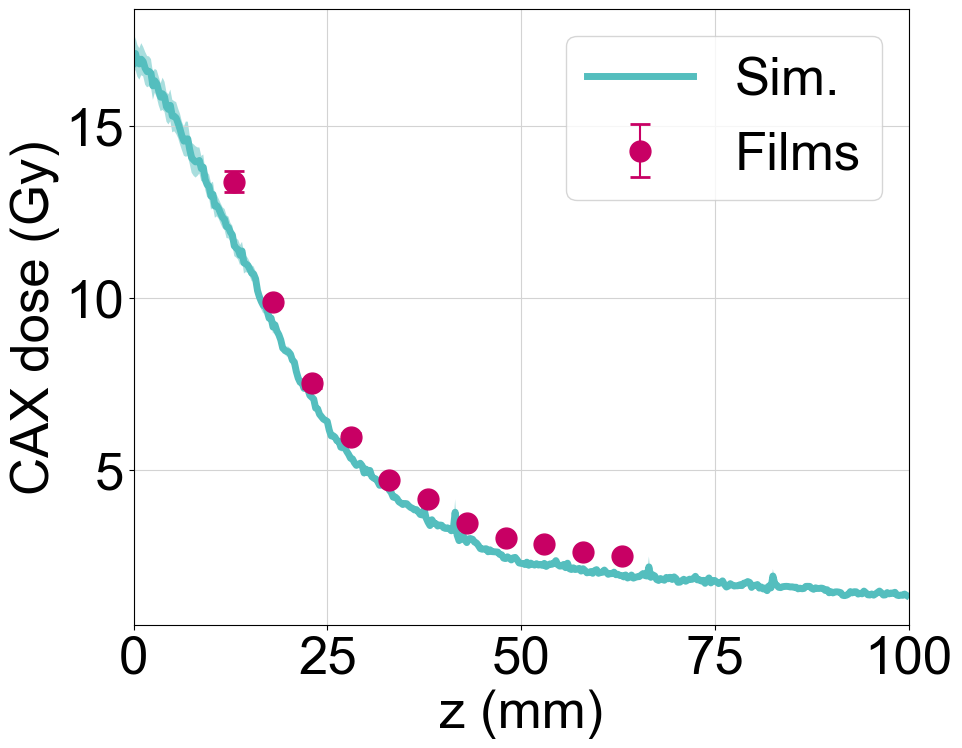

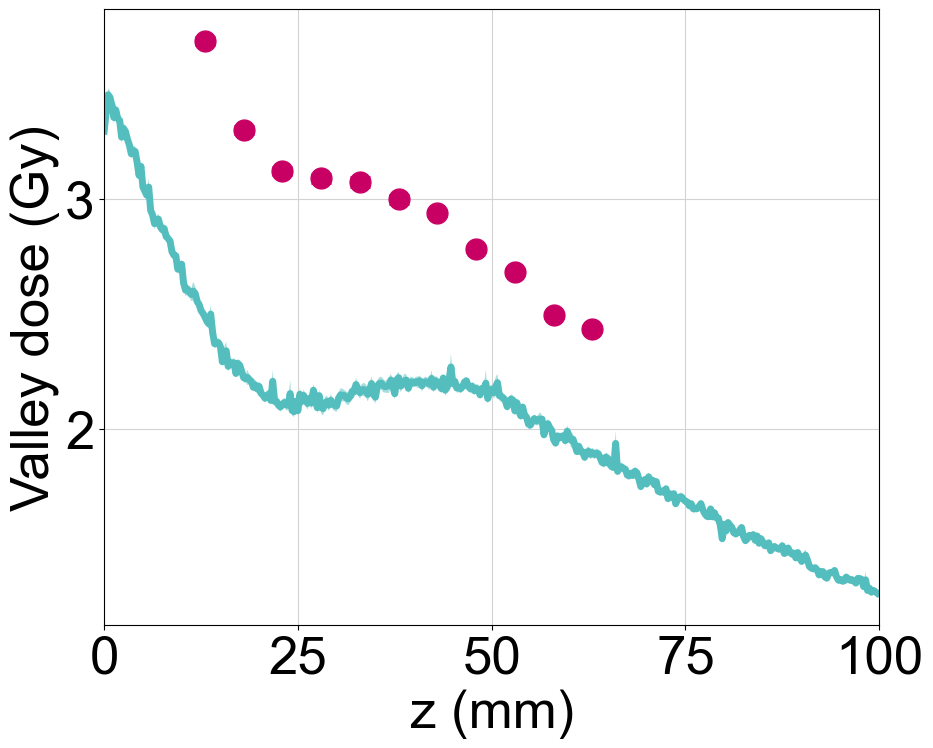

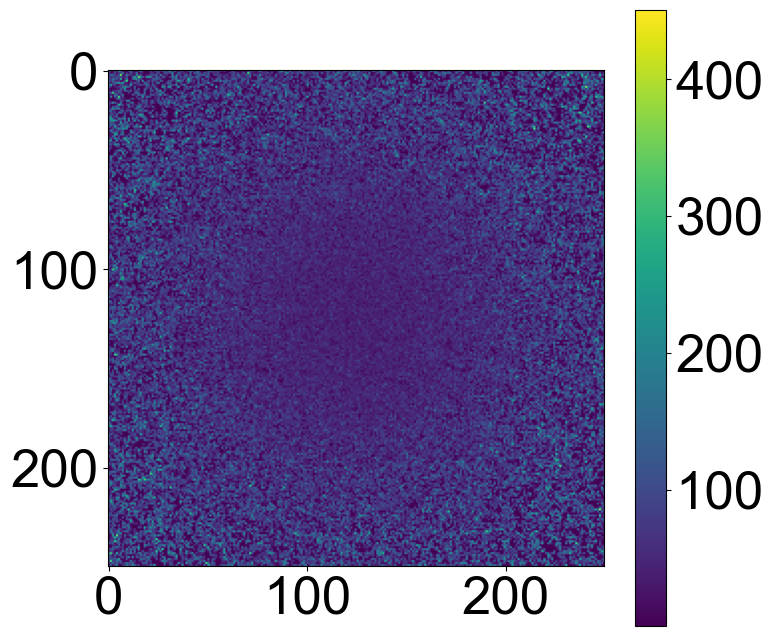

In [43]:
%matplotlib inline
#matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 38}

matplotlib.rc('font', **font)

E=200
x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)


figure(1,figsize=(8,8))
plt.imshow(GRID[52],cmap='magma')
plt.colorbar(shrink=0.6,label='Dose (Gy)')


peaks=[]
peaks_std=[]
valleys=[]
valleys_std=[]
#Find peak indices
xy = [124,124]
for k in range(len(GRID)):
    #plot 2d profiles
    if k==0:
        figure(k+30,figsize=(8,8))
        profile=GRID[k,xy[1]-100:xy[1]+100,xy[0]-100:xy[0]+100]
        plt.imshow(GRID[k],vmin=0,vmax=12,cmap='inferno')#,extent=(0,len(profile)/300*25.4,0,len(profile)/300*25.4))
        plt.colorbar(shrink=0.6,label='Dose (Gy)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0],alpha=0.4,c='white')
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0],alpha=0.4,c='cyan')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0],alpha=0.4,c='cyan')
    #ROIs for peaks and valleys + error
    peaks.append(np.mean([[GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]]))
    peaks_std.append(np.std([GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])/np.sqrt(len([GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])))
    valleysx=np.array([GRID[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
    valleysy=np.array([GRID[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
    valleys.append(np.mean(np.array([valleysx,valleysy]).flatten()))
    valleys_std.append(np.std(np.array([valleysx,valleysy]).flatten())/np.sqrt(len(np.array([valleysx,valleysy]).flatten())))
peaks=np.array(peaks)
peaks_std=np.array(peaks_std)
valleys=np.array(valleys)
valleys_std=np.array(valleys_std)

#pvdr
pvdr=peaks/np.array(valleys)
pvdr_std=np.sqrt((np.array(peaks_std)/np.array(peaks))**2+(np.array(valleys_std)/np.array(valleys))**2)*pvdr




gridfilm=np.load('D:Desktop/thesis/'+str(E)+'MeV.npy',allow_pickle=True)
filmlocs=np.arange(13,63+1,5)
figure(2,figsize=(10,8))
plt.plot(z,pvdr,lw=5,label='Simulation')
plt.fill_between(z,pvdr-pvdr_std,pvdr+pvdr_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[5],yerr=gridfilm[6],fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('PVDR')
plt.xlim(0,100)
#plt.legend()
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)

figure(3,figsize=(10,8))
plt.plot(z,peaks,lw=5,label='Sim.')
plt.fill_between(z,peaks-peaks_std,peaks+peaks_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[1]*(2.73e-8),yerr=gridfilm[2]*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('CAX dose (Gy)')
plt.legend()
plt.xlim(0,100)

figure(4,figsize=(10,8))
plt.plot(z,valleys,lw=5,label='Simul.')
plt.fill_between(z,valleys-valleys_std,valleys+valleys_std,alpha=0.5)
plt.errorbar(filmlocs,np.array(gridfilm[7])*(2.73e-8),yerr=np.array(gridfilm[8])*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('Valley dose (Gy)')
#plt.legend()
plt.xlim(0,100)

# np.save('D:Desktop/thesis/grid1d_y1.npy',np.mean(GRID[52,124-100:124+100,123:126],axis=1))
# np.save('D:Desktop/thesis/grid1d_y2.npy',np.mean(GRID[252,124-100:124+100,123:126],axis=1))
# np.save('D:Desktop/thesis/grid1d_x1.npy',np.mean(GRID[52,123:126,124-100:124+100],axis=0))
# np.save('D:Desktop/thesis/grid1d_x2.npy',np.mean(GRID[252,123:126,124-100:124+100],axis=0))

# np.save('D:Desktop/thesis/grid1d_x3.npy',np.mean(GRID[132,123:126,124-100:124+100],axis=0))
# np.save('D:Desktop/thesis/grid1d_y3.npy',np.mean(GRID[132,124-100:124+100,123:126],axis=1))

CAXdiff=[]
valdiff=[]
pvdrdiff=[]
for i in np.arange(0,11):
    CAXdiff.append(np.abs((gridfilm[1][i]*(2.73e-8)-peaks[52+i*20])/(gridfilm[1][i]*(2.73e-8))*100))
    valdiff.append(np.abs((gridfilm[7][i]*(2.73e-8)-valleys[52+i*20])/(gridfilm[7][i]*(2.73e-8))*100))
    pvdrdiff.append(np.abs((gridfilm[5][i]-pvdr[52+i*20])/pvdr[52+i*20]*100))
                    
print(CAXdiff,valdiff,pvdrdiff)
print(np.mean(CAXdiff),np.mean(valdiff),np.mean(pvdrdiff))


figure(69,figsize=(8,8))
plt.imshow(GRID_std[-1]/GRID[-1]*100)
plt.colorbar()

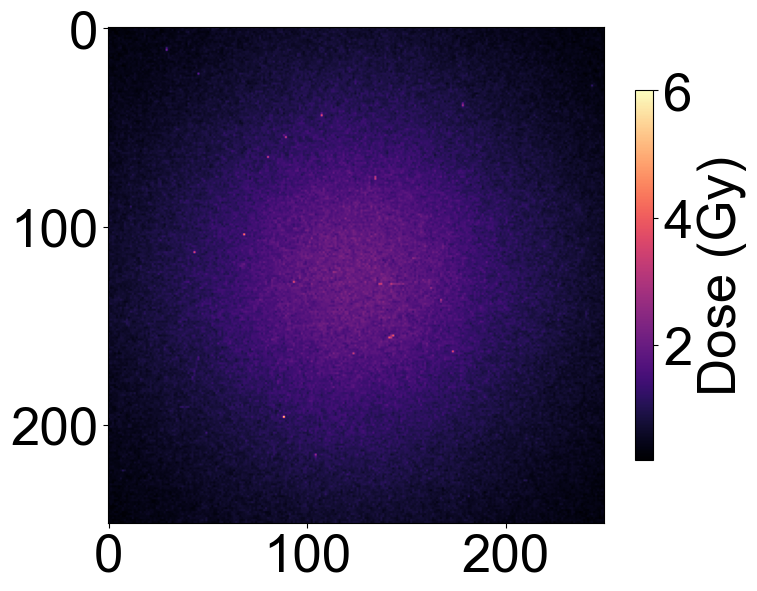

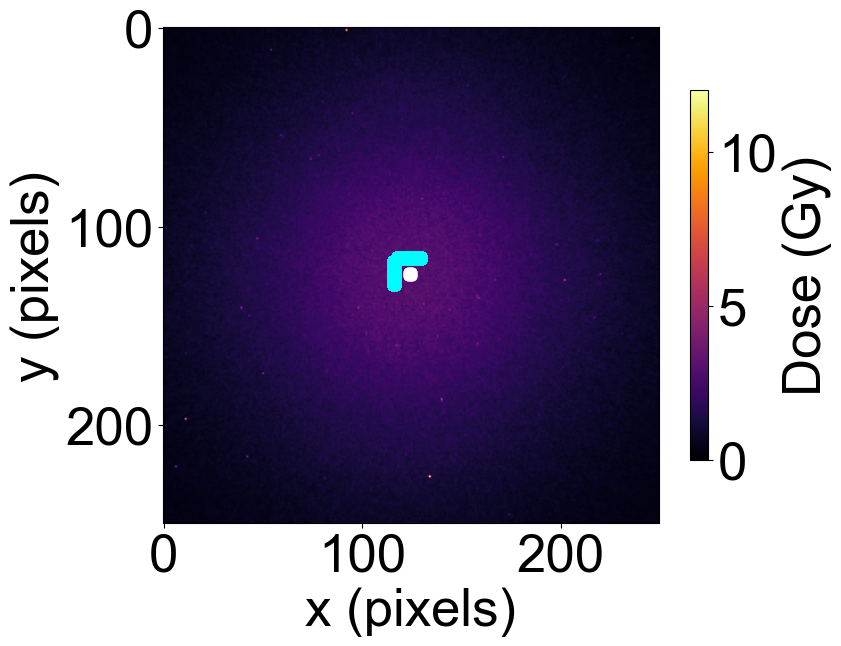

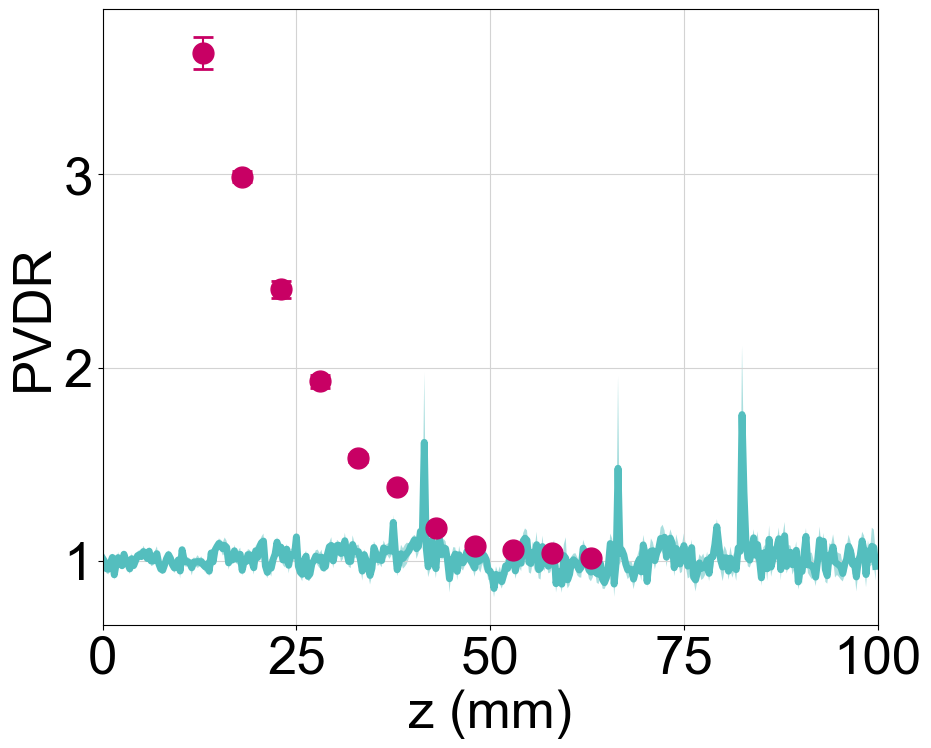

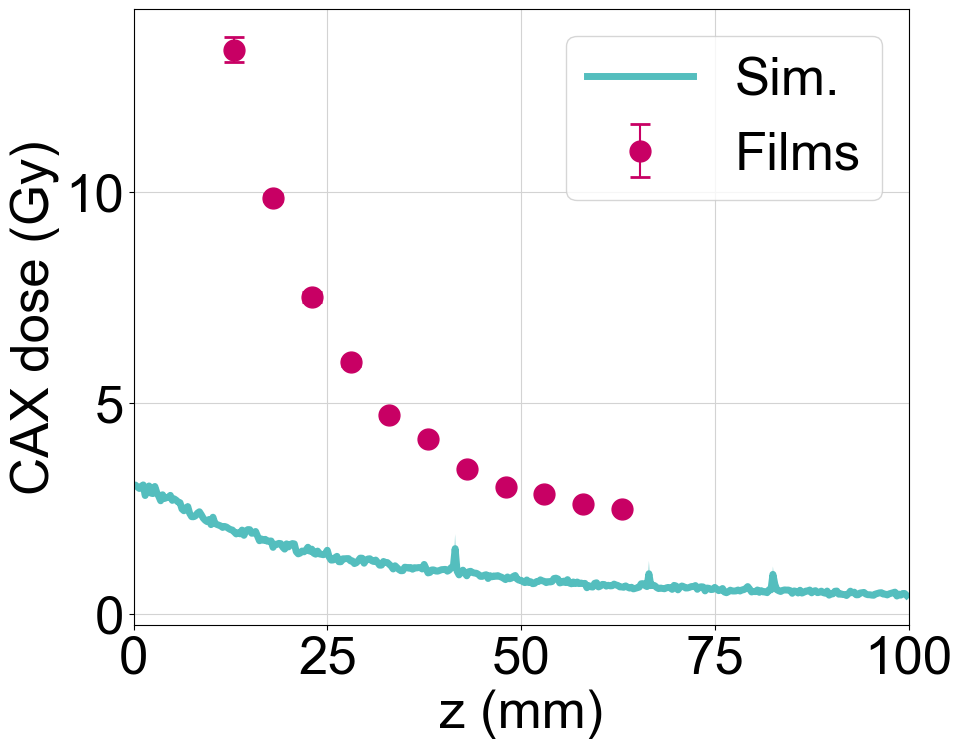

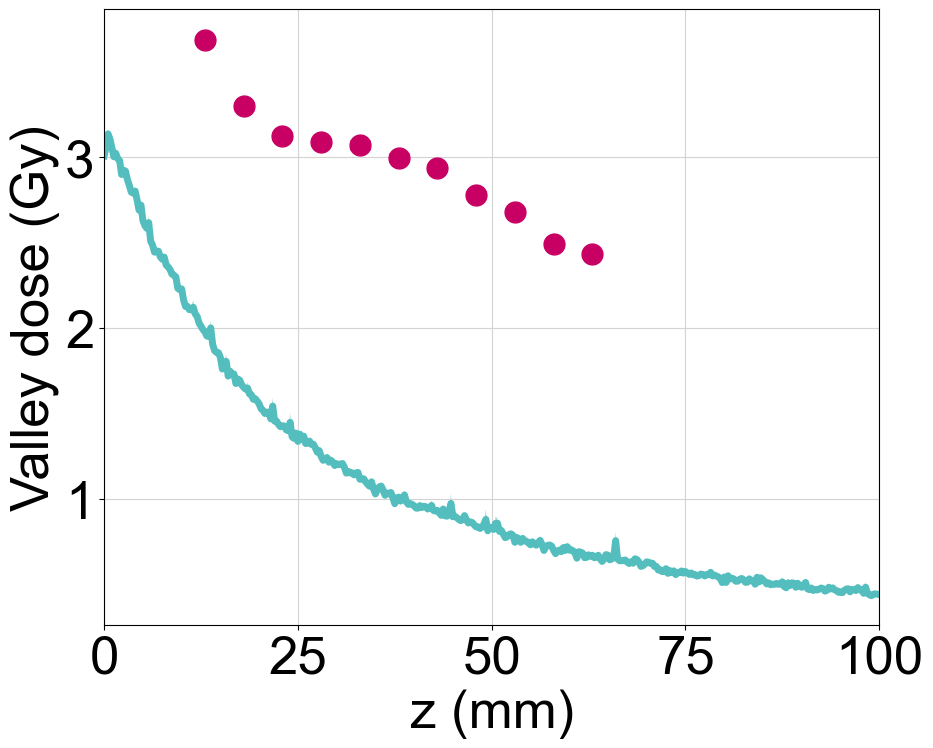

In [13]:
%matplotlib inline
#matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 38}

matplotlib.rc('font', **font)

E=200
x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)


figure(1,figsize=(8,8))
plt.imshow(GRID_photon[52],cmap='magma')
plt.colorbar(shrink=0.6,label='Dose (Gy)')


peaks=[]
peaks_std=[]
valleys=[]
valleys_std=[]
#Find peak indices
xy = [124,124]
for k in range(len(GRID_photon)):
    #plot 2d profiles
    if k==0:
        figure(k+30,figsize=(8,8))
        profile=GRID_photon[k,xy[1]-100:xy[1]+100,xy[0]-100:xy[0]+100]
        plt.imshow(GRID_photon[k],vmin=0,vmax=12,cmap='inferno')#,extent=(0,len(profile)/300*25.4,0,len(profile)/300*25.4))
        plt.colorbar(shrink=0.6,label='Dose (Gy)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0],alpha=0.4,c='white')
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0],alpha=0.4,c='cyan')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0],alpha=0.4,c='cyan')
    #ROIs for peaks and valleys + error
    peaks.append(np.mean([[GRID_photon[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]]))
    peaks_std.append(np.std([GRID_photon[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])/np.sqrt(len([GRID_photon[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])))
    valleysx=np.array([GRID_photon[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
    valleysy=np.array([GRID_photon[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
    valleys.append(np.mean(np.array([valleysx,valleysy]).flatten()))
    valleys_std.append(np.std(np.array([valleysx,valleysy]).flatten())/np.sqrt(len(np.array([valleysx,valleysy]).flatten())))
peaks=np.array(peaks)
peaks_std=np.array(peaks_std)
valleys=np.array(valleys)
valleys_std=np.array(valleys_std)

#pvdr
pvdr=peaks/np.array(valleys)
pvdr_std=np.sqrt((np.array(peaks_std)/np.array(peaks))**2+(np.array(valleys_std)/np.array(valleys))**2)*pvdr




gridfilm=np.load('D:Desktop/thesis/'+str(E)+'MeV.npy',allow_pickle=True)
filmlocs=np.arange(13,63+1,5)
figure(2,figsize=(10,8))
plt.plot(z,pvdr,lw=5,label='Simulation')
plt.fill_between(z,pvdr-pvdr_std,pvdr+pvdr_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[5],yerr=gridfilm[6],fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('PVDR')
plt.xlim(0,100)
#plt.legend()
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)

figure(3,figsize=(10,8))
plt.plot(z,peaks,lw=5,label='Sim.')
plt.fill_between(z,peaks-peaks_std,peaks+peaks_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[1]*(2.73e-8),yerr=gridfilm[2]*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('CAX dose (Gy)')
plt.legend()
plt.xlim(0,100)

figure(4,figsize=(10,8))
plt.plot(z,valleys,lw=5,label='Simul.')
plt.fill_between(z,valleys-valleys_std,valleys+valleys_std,alpha=0.5)
plt.errorbar(filmlocs,np.array(gridfilm[7])*(2.73e-8),yerr=np.array(gridfilm[8])*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('Valley dose (Gy)')
#plt.legend()
plt.xlim(0,100)

photon_peaks=peaks
photon_valleys=valleys

27.91317148707135
51.185152890235265
1.8214285714285714


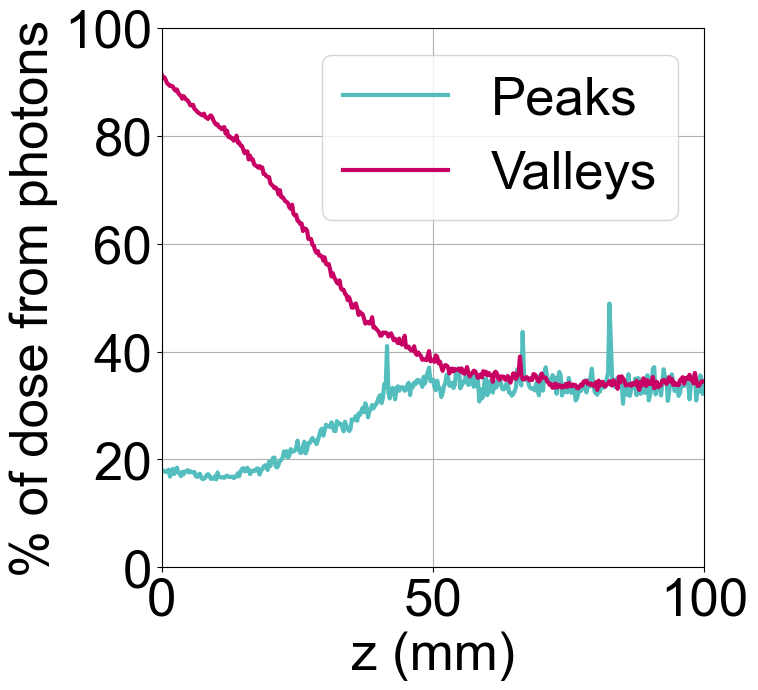

In [28]:
figure(1,figsize=(7,7))
plt.plot(z,photon_peaks/peaks*100,lw=3,label='Peaks')
plt.plot(z,photon_valleys/valleys*100,lw=3,label='Valleys')
plt.grid()
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel('z (mm)')
plt.ylabel('% of dose from photons')
plt.legend()

print(np.mean(photon_peaks[52:252]/peaks[52:252])*100)
print(np.mean(photon_valleys[52:252]/valleys[52:252])*100)
print(51/28)

5.587811281427255 2.490468415067627
1.5090426811372317 1.7582495942599965
[0.65396691 0.65804097 0.65202504 0.64573974 0.65046361 0.61920135
 0.65327797 0.62222244 0.62563201 0.63609763 0.66211486 0.64060643
 0.65548307 0.62943231 0.64772671 0.67761155 0.67179515 0.65283101
 0.62643935 0.66663581 0.70420727 0.69092596 0.66004692 0.6666238
 0.67248131 0.69116424 0.70915028 0.72758778 0.7084131  0.6950019
 0.7148587  0.70603331 0.72625195 0.72506982 0.70845043 0.73473088
 0.78493224 0.71245916 0.70673662 0.7156812  0.73272945 0.69298397
 0.75225286 0.71108153 0.74421567 0.76305909 0.80672949 0.7498211
 0.75571847 0.73074928 0.77321773 0.7439907  0.78326184 0.78181996
 0.7754051  0.77208324 0.78046197 0.80587077 0.79982953 0.76447268
 0.77317928 0.79085448 0.79735176 0.78702396 0.80879367 0.85933555
 0.82871382 0.793779   0.87513384 0.89377135 0.85007481 0.81461473
 0.88365502 0.850638   0.95698419 0.86684    0.92883665 0.91261275
 0.87849747 0.89868548 0.93086074 0.97784542 0.95464497 0.

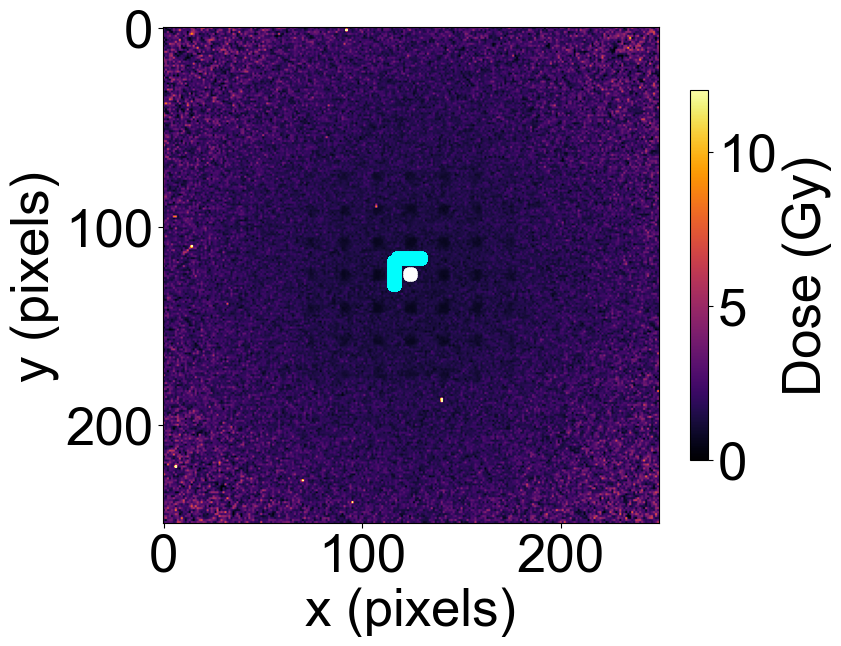

In [49]:
errorthing=GRID_std/20/GRID*100

peaks=[]
peaks_std=[]
valleys=[]
valleys_std=[]
#Find peak indices
xy = [124,124]
for k in range(len(errorthing)):
    #plot 2d profiles
    if k==0:
        figure(k+30,figsize=(8,8))
        profile=errorthing[k,xy[1]-100:xy[1]+100,xy[0]-100:xy[0]+100]
        plt.imshow(errorthing[k],vmin=0,vmax=12,cmap='inferno')#,extent=(0,len(profile)/300*25.4,0,len(profile)/300*25.4))
        plt.colorbar(shrink=0.6,label='Dose (Gy)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0],alpha=0.4,c='white')
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0],alpha=0.4,c='cyan')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0],alpha=0.4,c='cyan')
    #ROIs for peaks and valleys + error
    peaks.append(np.mean([[errorthing[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]]))
    peaks_std.append(np.std([errorthing[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])/np.sqrt(len([errorthing[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])))
    valleysx=np.array([errorthing[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
    valleysy=np.array([errorthing[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
    valleys.append(np.mean(np.array([valleysx,valleysy]).flatten()))
    valleys_std.append(np.std(np.array([valleysx,valleysy]).flatten())/np.sqrt(len(np.array([valleysx,valleysy]).flatten())))
peaks=np.array(peaks)
peaks_std=np.array(peaks_std)
valleys=np.array(valleys)
valleys_std=np.array(valleys_std)

print(np.max(peaks),np.max(valleys))
print(np.mean(peaks),np.mean(valleys))
print(peaks)